In [2]:
import pandas as pd
import psycopg2
import yfinance as yf
import warnings
from tqdm import tqdm
import numpy as np
warnings.filterwarnings("ignore")

/Users/tp_mini/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


521

In [74]:
import pandas as pd
import psycopg2
import yfinance as yf
import warnings
from tqdm import tqdm
import numpy as np
df = yf.download(['NKE'], start='2023-05-01', rounding=2, ignore_tz=True)
import statsmodels.api as sm
pct_close_w = df[['Open']].pct_change().iloc[1:, :]
indexes = pct_close_w.index
tickers = pct_close_w.iloc[:, :].columns
indices = indexes[52:]
forecast = np.zeros((len(indices), len(tickers)))
print(indices[0])
for index, date in enumerate(tqdm(indices, desc=f"arma model for top {len(tickers)}, enumerate by da")):
    pct_train = pct_close_w.loc[indexes[index]:date]
    for i in range(len(tickers)):
        series = pct_train[tickers[i]]
        if series.isna().any():
            prediction = 0
            print(tickers[i], "failed at", date)
            continue
            ###### ARIMA ma
        else:
            model = sm.tsa.arima.ARIMA(series, order=(2, 0, 0))
            model_fit = model.fit()
            prediction = model_fit.forecast().values[0]
        forecast[index, i] = prediction
factor = pd.DataFrame(forecast, columns=tickers, index=indices)

import matplotlib.pyplot as plt

factor.columns = ['Factor']
factor1 = factor#['2024-05-01':]
factor1['Clo'] = df['Open'].pct_change()
# factor1['Factor'] = factor1['Factor'].shift(-i)
factor1['signal'] = factor1.apply(lambda x: 1 if x['Factor'] >= 0 else -1, axis=1)
factor1['ret'] = factor1['Clo'] * factor1['signal']
# ax.plot(factor1['ret'].cumsum(), label='lag {}'.format(i))
factor1.tail(10)

[*********************100%***********************]  1 of 1 completed


2023-07-18 00:00:00


arma model for top 1, enumerate by da:   0%|          | 0/344 [00:00<?, ?it/s]/Users/tp_mini/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tp_mini/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tp_mini/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tp_mini/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No 

,Factor,Clo,signal,ret
Date,,,,
2024-11-12,-0.000901,0.004071,-1,-0.004071
2024-11-13,-0.000564,0.005885,-1,-0.005885
2024-11-14,-0.001267,-0.002991,-1,0.002991
2024-11-15,-0.002086,-0.008868,-1,0.008868
2024-11-18,-0.000889,0.002105,-1,-0.002105
2024-11-19,-0.003095,-0.021796,-1,0.021796
2024-11-20,-0.003749,-0.011275,-1,0.011275
2024-11-21,-0.002543,-0.004073,-1,0.004073
2024-11-22,0.002363,0.037759,1,0.037759


In [ ]:
Clo: 11-11: 11-10預期收益
Factor: 11-11: 11-12 開始可以使用
Factor.shift(1): 11-11: 11-11開始可以使用
Clo.shift(-1): 11:11: 11:11預期收益
要做到0 lag, 生訊號碼上可以使用： Clo.shift(-2) or Factor.shift(2)
如果signal want lag: 11-11可以使用的factor要對到11-12 close => Clo.shift(-1) or(not and) Factor.shift(1)
Clo.shift(-i for i in range(2, 6))

In [437]:
import pandas as pd
import psycopg2
import yfinance as yf
import warnings
from tqdm import tqdm
import numpy as np
df = yf.download(['DIS'], start='2023-01-01', rounding=2, ignore_tz=True)
import statsmodels.api as sm
pct_close_w = df[['Open']].pct_change().iloc[1:, :]
indexes = pct_close_w.index
tickers = pct_close_w.iloc[:, :].columns
indices = indexes[52:]
forecast = np.zeros((len(indices), len(tickers)))
print(indices[0])
for index, date in enumerate(tqdm(indices, desc=f"arma model for top {len(tickers)}, enumerate by da")):
    pct_train = pct_close_w.loc[indexes[index]:date]
    for i in range(len(tickers)):
        series = pct_train[tickers[i]]
        if series.isna().any():
            prediction = 0
            print(tickers[i], "failed at", date)
            continue
            ###### ARIMA ma
        else:
            model = sm.tsa.arima.ARIMA(series, order=(2, 0, 0))
            model_fit = model.fit()
            prediction = model_fit.forecast().values[0]
        forecast[index, i] = prediction
factor = pd.DataFrame(forecast, columns=tickers, index=indices)

[*********************100%***********************]  1 of 1 completed


2023-03-21 00:00:00


arma model for top 1, enumerate by da:   0%|          | 0/419 [00:00<?, ?it/s]/Users/tp_mini/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tp_mini/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tp_mini/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tp_mini/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:838: ValueWarning: No 

In [65]:
a = {}
for code in ['MCD', "TSLA", "ADBE", "LLY", "ULTA"]:
    df = yf.download([code], start='2024-08-01', rounding=2, ignore_tz=True)
    pct_close_w = df[['Open']].pct_change().iloc[1:, :]
    indexes = pct_close_w.index
    tickers = pct_close_w.iloc[:, :].columns
    indices = indexes[52:]
    forecast = np.zeros((len(indices), len(tickers)))
    for index, date in enumerate(tqdm(indices, desc=f"arma model for top {len(tickers)}, enumerate by da")):
        pct_train = pct_close_w.loc[indexes[index]:date]
        for i in range(len(tickers)):
            series = pct_train[tickers[i]]
            if series.isna().any():
                prediction = 0
                print(tickers[i], "failed at", date)
                continue
                ###### ARIMA ma
            else:
                model = sm.tsa.arima.ARIMA(series, order=(2, 0, 0))
                model_fit = model.fit()
                prediction = model_fit.forecast().values[0]
            forecast[index, i] = prediction
    factor = pd.DataFrame(forecast, columns=tickers, index=indices)
    a[code] = factor.iloc[-3:]

[*********************100%***********************]  1 of 1 completed
arma model for top 1, enumerate by da:   0%|          | 0/25 [00:00<?, ?it/s]/Users/tp_mini/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tp_mini/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tp_mini/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tp_mini/Library/Python/3.9/lib/python/si

In [66]:
a

{'MCD':                 Open
 Date                
 2024-11-15  0.001730
 2024-11-18  0.003231
 2024-11-19  0.004109,
 'TSLA':                 Open
 Date                
 2024-11-15  0.001028
 2024-11-18  0.021686
 2024-11-19  0.008602,
 'ADBE':                 Open
 Date                
 2024-11-15  0.001320
 2024-11-18  0.000314
 2024-11-19 -0.002628,
 'LLY':                 Open
 Date                
 2024-11-15  0.008319
 2024-11-18  0.007763
 2024-11-19 -0.000808,
 'ULTA':                 Open
 Date                
 2024-11-15 -0.015593
 2024-11-18  0.004068
 2024-11-19 -0.007367}

In [ ]:
AMD -3 
SBUX -3
MSFT -3
MRK -3
DIS -3
IDXX -3

In [72]:
df['Open']

Date
2024-01-02    107.61
2024-01-03    105.72
2024-01-04    102.46
2024-01-05    102.46
2024-01-08    102.08
               ...  
2024-11-18     76.16
2024-11-19     74.50
2024-11-20     73.66
2024-11-21     73.36
2024-11-22     73.36
Name: Open, Length: 227, dtype: float64

In [76]:
import pandas as pd
import psycopg2
import yfinance as yf
import warnings
from tqdm import tqdm
import numpy as np
df = yf.download(['NKE'], start='2024-01-01', rounding=2, ignore_tz=True)
import statsmodels.api as sm
pct_close_w = df[['Open']].pct_change().iloc[1:, :]
indexes = pct_close_w.index
tickers = pct_close_w.iloc[:, :].columns
indices = indexes[52:]
forecast = np.zeros((len(indices), len(tickers)))
print(indices[0])
for index, date in enumerate(tqdm(indices, desc=f"arma model for top {len(tickers)}, enumerate by da")):
    pct_train = pct_close_w.loc[indexes[index]:date]
    for i in range(len(tickers)):
        series = pct_train[tickers[i]]
        if series.isna().any():
            prediction = 0
            print(tickers[i], "failed at", date)
            continue
            ###### ARIMA ma
        else:
            model = sm.tsa.arima.ARIMA(series, order=(2, 0, 0))
            model_fit = model.fit()
            prediction = model_fit.forecast().values[0]
        forecast[index, i] = prediction
factor = pd.DataFrame(forecast, columns=tickers, index=indices)

[*********************100%***********************]  1 of 1 completed


2024-03-19 00:00:00


arma model for top 1, enumerate by da:   0%|          | 0/175 [00:00<?, ?it/s]/Users/tp_mini/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tp_mini/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tp_mini/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tp_mini/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No 

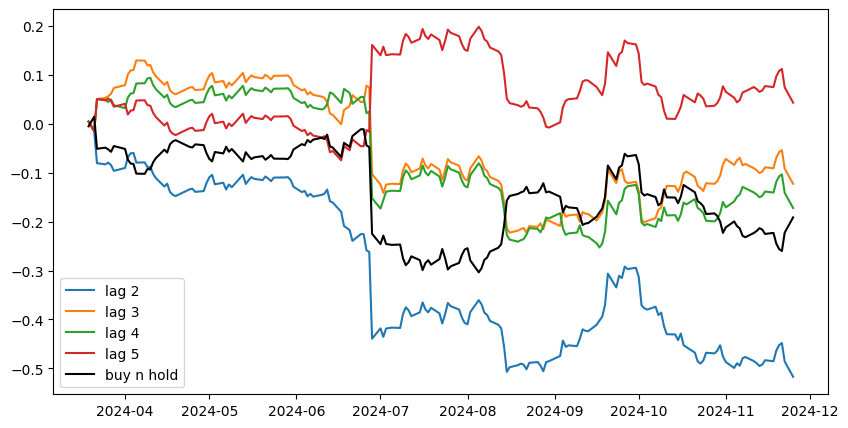

In [77]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
for i in range(2, 6):
    factor = pd.DataFrame(forecast, columns=tickers, index=indices)
    factor.columns = ['Factor']
    factor1 = factor#.loc['2024-01-01':, :]
    factor1['Clo'] = df['Open'].pct_change()
    # factor1['Clo'] = factor1.apply(lambda x: 0 if abs(x['Clo']) > 0.03 else x['Clo'], axis=1)
    factor1['Factor'] = factor1['Factor'].shift(i) # 3: lag 1 day of signal
    # factor1.dropna(inplace=True)
    factor1['signal'] = factor1.apply(lambda x: 1 if x['Factor'] >= 0 else -1, axis=1)
    factor1['ret'] = factor1['Clo'] * factor1['signal']
    ax.plot(factor1['ret'].cumsum(), label='lag {}'.format(i))
ax.plot(pct_close_w[factor1.index[0]:].cumsum(), label='buy n hold', color='black')
plt.legend()

11/18
NKE 3 DAYS AGO
NKE short for 3 days

In [69]:
factor = pd.DataFrame(forecast, columns=tickers, index=indices)
factor.columns = ['Factor']
factor1 = factor#['2024-05-01':]
factor1.iloc[-30:]

,Factor
Date,
2024-10-11,0.000718
2024-10-14,0.000683
2024-10-15,-0.000778
2024-10-16,0.002504
2024-10-17,0.007094
2024-10-18,0.004416
2024-10-21,0.000292
2024-10-22,-0.002143
2024-10-23,-0.000627


In [49]:
# predictability
factor = pd.DataFrame(forecast, columns=tickers, index=indices)
factor.columns = ['Factor']
factor1 = factor#['2024-05-01':]
factor1['lag7'] = factor1['Factor'].shift(-5)
factor1 = factor1[factor1['Factor'] <= 0]
factor1['same'] = factor1.apply(lambda x: 1 if x['lag7']*x['Factor'] >= 0 else 0, axis=1)
factor2 = factor1.dropna()
factor2
factor2['same'].value_counts()[1] / len(factor2), factor2['same'].value_counts(), factor2

/var/folders/cb/s9sjq6dx01990v5hdvfhl7x40000gn/T/ipykernel_97633/1858109423.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor1['same'] = factor1.apply(lambda x: 1 if x['lag7']*x['Factor'] >= 0 else 0, axis=1)


(np.float64(0.45794392523364486),
 same
 0    58
 1    49
 Name: count, dtype: int64,
               Factor      lag7  same
 Date                                
 2023-03-24 -0.001339 -0.001588     1
 2023-03-27 -0.002339  0.001000     0
 2023-03-28 -0.000220  0.001460     0
 2023-03-31 -0.001588  0.001993     0
 2023-04-12 -0.004784  0.001614     0
 ...              ...       ...   ...
 2024-09-25 -0.000069  0.001045     0
 2024-10-07 -0.000069  0.000593     0
 2024-10-10 -0.001285  0.005825     0
 2024-10-22 -0.002593  0.001140     0
 2024-10-31 -0.000033  0.000016     0
 
 [107 rows x 3 columns])

<Axes: xlabel='Date'>

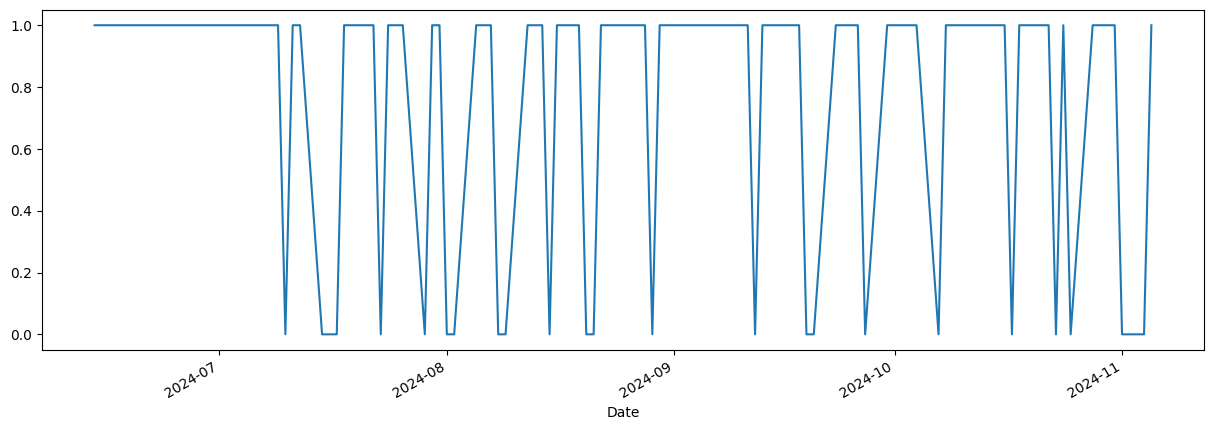

In [355]:
factor2['same'][-100:].plot(figsize=(15, 5))

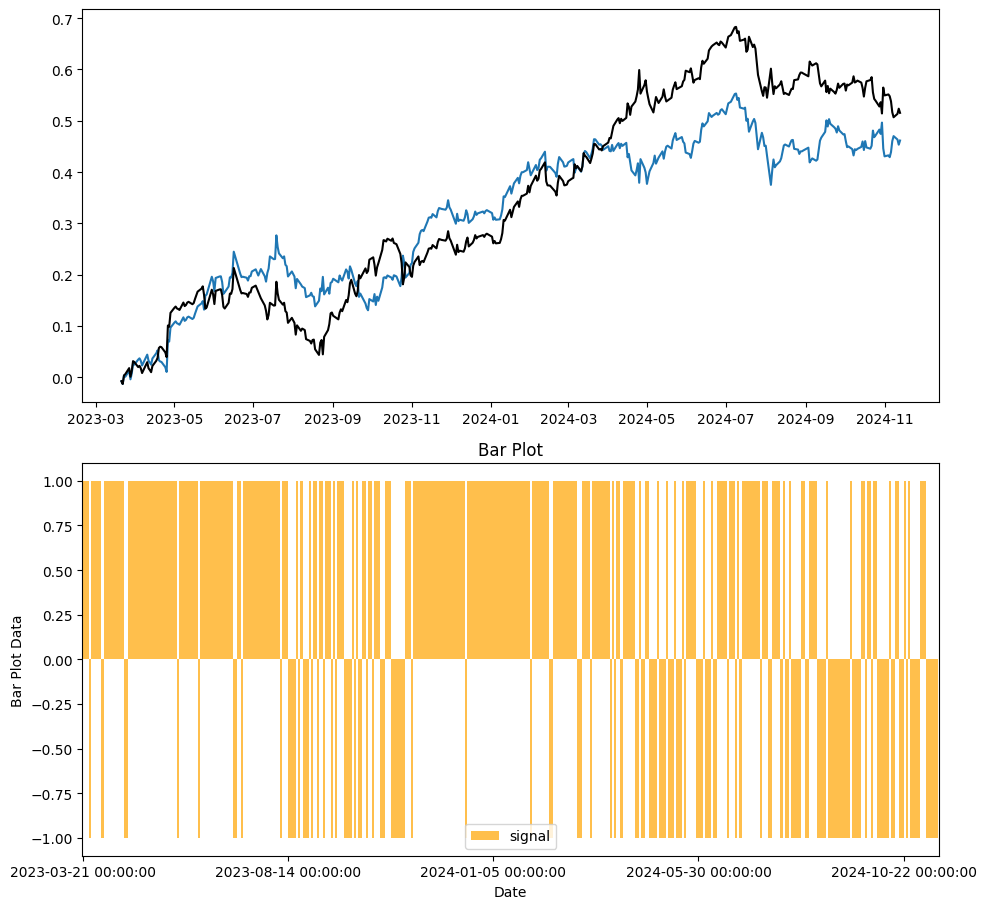

In [366]:
factor = pd.DataFrame(forecast, columns=tickers, index=indices)
factor.columns = ['Factor']
factor1 = factor#['2024-05-01':]

factor1['Clo'] = df['Open'].pct_change()
factor1['Factor'] = factor1['Factor'].shift(-5)
factor1['signal'] = factor1.apply(lambda x: 1 if x['Factor'] >= 0 else -1, axis=1)
factor1['ret'] = factor1['Clo'] * factor1['signal']
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
ax1.plot(pct_close_w[factor1.index[0]:].cumsum())
ax1.plot(factor1['ret'].cumsum(), color="black", label="Strategy")
factor1['signal'].plot(kind='bar', ax=ax2, color="orange", width=1, position=0, alpha=0.7)
ax2.set_ylabel("Bar Plot Data")
ax2.set_title("Bar Plot")

# Adjust x-ticks to show every 12th tick for clarity in the bar plot
ax2.set_xticks(ax2.get_xticks()[::100])
plt.setp(ax2.get_xticklabels(), rotation=0)
plt.legend()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit titles
plt.show()

11/13
1. ODFL long
2. BA short
3. SBUX short
4. MRK short / tomorrow long